In [13]:
#Date: 30/01/2022
#Author: Vijay Kumar Mishra (PHFI)
#Task: Data Analysis
#Data: Global Adult Tobacco Survey-1(2009)and Global Adult Tobacco Survey-2(2016)
#Data File name: GATS_1_India_2009 and GATS_2_India_2016

In [6]:
conda install -c conda-forge pyreadstat

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\VijayKumarMishra\anaconda3

  added / updated specs:
    - pyreadstat


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge

Note: you may need to restart the kernel to use updated packages.    pyreadstat-1.1.4           |   py38heb50f4f_0         1.2 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        18.1 MB

The following NEW packages will be INSTALLED:

  pyreadstat         conda-forge/win-64::pyreadstat-1.1.4-py38heb50f4f_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda






  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   | 4          |   4% 
conda-4.11.0         | 16.9 MB   | 8          |   9% 
conda-4.11.0         | 16.9 MB   | #2         |  13% 
conda-4.11.0         | 16.9 MB   | #6         |  16% 
conda-4.11.0         | 16.9 MB   | ##         |  20% 
conda-4.11.0         | 16.9 MB   | ##3        |  24% 
conda-4.11.0         | 16.9 MB   | ##7        |  27% 
conda-4.11.0         | 16.9 MB   | ###1       |  31% 
conda-4.11.0         | 16.9 MB   | ###5       |  36% 
conda-4.11.0         | 16.9 MB   | ###9       |  39% 
conda-4.11.0         | 16.9 MB   | ####3      |  44% 
conda-4.11.0         | 16.9 MB   | ####8      |  49% 
conda-4.11.0         | 16.9 MB   | #####2     |  53% 
conda-4.11.0         | 16.9 MB   | #####6     |  56% 
conda-4.11.0         | 16

In [7]:
# load some required packages used for import, export and data analysis
import pandas
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

Matplotlib is building the font cache; this may take a moment.


In [14]:
gats_1_vm= '~/Desktop/GATS/GATS_1_India_2009.dta'

In [15]:
gats_2_vm= '~/Desktop/GATS/GATS_2_India_2016.dta'

In [16]:
pandas.set_option("display.max_columns", None)

gats_1_vm= pd.read_stata("GATS_1_India_2009.dta", convert_categoricals=False)

gats_2_vm= pd.read_stata("GATS_2_India_2016.dta", convert_categoricals=False)

In [17]:
gats_1_vm.head(100)

,caseid,age,residence,gatsstrata,gatscluster,gatsweight,selectee,nregion,state,hh1,hh2,hh3,hh4b,HH4b001,HH4b002,HH4b003,HH4b004,HH4b005,HH4b006,HH4b007,HH4b008,HH4b009,HH4b010,HH4b011,HH4b012,HH4b013,HH4b014,HH4b015,hh4c,HH4c001,HH4c002,HH4c003,HH4c004,HH4c005,HH4c006,HH4c007,HH4c008,HH4c009,HH4c010,HH4c011,HH4c012,HH4c013,HH4c014,HH4c015,HH4cYear,HH4cYear001,HH4cYear002,HH4cYear003,HH4cYear004,HH4cYear005,HH4cYear006,HH4cYear007,HH4cYear008,HH4cYear009,HH4cYear010,HH4cYear011,HH4cYear012,HH4cYear013,HH4cYear014,HH4cYear015,hh4d,HH4d001,HH4d002,HH4d003,HH4d004,HH4d005,HH4d006,HH4d007,HH4d008,HH4d009,HH4d010,HH4d011,HH4d012,HH4d013,HH4d014,HH4d015,hh4e,HH4e001,HH4e002,HH4e003,HH4e004,HH4e005,HH4e006,HH4e007,HH4e008,HH4e009,HH4e010,HH4e011,HH4e012,HH4e013,HH4e014,HH4e015,hh4f,HH4f001,HH4f002,HH4f003,HH4f004,HH4f005,HH4f006,HH4f007,HH4f008,HH4f009,HH4f010,HH4f011,HH4f012,HH4f013,HH4f014,HH4f015,IntLang,a01,A01a,A02a,A02b,a03,A03a,a04,a05,A06a,A06b,A06h,A06i,A06e,A06g,A06j,A06c,A06d,A06f,b01,b02,b03,b04,b05,B06a,B06a1,B06b,B06b1,B06c,B06c1,B06d,B06d1,B06e,B06e1,B06f,B06f1,B06f2,b07,b08,b09,B10a,B10b,B10c,B10d,B10e,B10f,B10f1,b11,b12,B13a,B13b,b14,b15,b16,b17,B18a,B18b,B18c,B18d,B18e,B18f,B18g,B18g1,c01,c02,c03,c04,c05,C06a,C06a1,C06b,C06b1,C06c,C06c1,C06d,C06d1,C06e,C06e1,C06f,C06f1,C06g,C06g1,C06g2,c07,c08,c09,C10a,C10b,C10c,C10d,C10e,C10f,C10g,C10g1,c11,c12,C13a,C13b,c14,c15,c16,c17,C18a,C18d,C18g,C18g1,d01,D02a,D02b,D03a,D03b,D03c,D03d,D03e,D03f,D03g,D03g1,d04,d05,d06,d07,d08,d09,D10a,D10b,D11a,D11d,D11g,D11g1,d12,d13,d14,d15,d16,ee01,e02,e03,e04,e05,e06,e07,e08,e09,e10,e11,e12,e13,e14,EE13a,EE13b,e15,e16,e17,F01a,F01b,F01c,F01d,f02,f03,F03a,f04,F04a,FA01a,FA01b,FA01c,FA01d,fa02,fa03,FA03a,fa04,FA04a,FB01a,FB01b,FB01c,fb02,fb03,fb04,FB04a,G01a1,G01a2,G01a3,G01b1,G01b2,G01b3,G01c1,G01c2,G01c3,G01d1,G01d2,G01d3,G01e1,G01e1a,G01e2,G01e2a,G01e3,G01e3a,g02,g03,G02a,G03a,G04a1,G04a2,G04a3,G04b1,G04b2,G04b3,G04c1,G04c2,G04c3,G04d1,G04d2,G04d3,G04e1,G04e2,G04e3,G04f1,G04f2,G04f3,G04g1,G04g2,G04g3,G04h1,G04h2,G04h3,G04i1,G04i2,G04i3,G04j1,G04j2,G04j3,G04k1,G04k1a,G04k2,G04k2a,G04k3,G04k3a,G06a1,G06a2,G06a3,G06b1,G06b2,G06b3,G06c1,G06c2,G06c3,G06d1,G06d2,G06d3,G06e1,G06e2,G06e3,G06f1,G06f2,G06f3,G06g1,G06g2,G06g3,h01,H02a,H02b,H02c,h03
0,1.0,24.0,2.0,2.0,1001.0,12695.423447,2.0,1.0,1.0,11.0,9.0,5.0,24.0,56.0,24.0,23.0,19.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,77.0,7777.0,24.0,1.0,2.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,7.0,1.0,7.0,2.0,NaN,1.0,7.0,1.0,NaN,NaN,,NaN,NaN,NaN,,NaN,,NaN,NaN,,NaN,NaN,NaN,,NaN,,NaN,NaN,,NaN,NaN,NaN,,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,,2.0,,2.0,,1.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,2.0,,2.0,,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,7.0,7.0,1.0,1.0
1,2.0,45.0,2.0,2.0,1001.0,3579.544206,3.0,1.0,1.0,8.0,5.0,2.0,NaN,73.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
gats_2_vm.head(100)

,CASEID,FIID,Residence,stateid,regionid,GATSSTRATA,gatscluster,gatsweight,INTLANG,Selectee,AGE,HH1,HH2,HH3,HH4B,HH4C,HH4CYEAR,HH4D,HH4E,HH4F,HH4B01,HH4B02,HH4B03,HH4B04,HH4B05,HH4B06,HH4B07,HH4B08,HH4B09,HH4B10,HH4B11,HH4B12,HH4B13,HH4B14,HH4B15,HH4B16,HH4B17,HH4B18,HH4B19,HH4B20,HH4C01,HH4C02,HH4C03,HH4C04,HH4C05,HH4C06,HH4C07,HH4C08,HH4C09,HH4C10,HH4C11,HH4C12,HH4C13,HH4C14,HH4C15,HH4C16,HH4C17,HH4C18,HH4C19,HH4C20,HH4CYEAR01,HH4CYEAR02,HH4CYEAR03,HH4CYEAR04,HH4CYEAR05,HH4CYEAR06,HH4CYEAR07,HH4CYEAR08,HH4CYEAR09,HH4CYEAR10,HH4CYEAR11,HH4CYEAR12,HH4CYEAR13,HH4CYEAR14,HH4CYEAR15,HH4CYEAR16,HH4CYEAR17,HH4CYEAR18,HH4CYEAR19,HH4CYEAR20,HH4D01,HH4D02,HH4D03,HH4D04,HH4D05,HH4D06,HH4D07,HH4D08,HH4D09,HH4D10,HH4D11,HH4D12,HH4D13,HH4D14,HH4D15,HH4D16,HH4D17,HH4D18,HH4D19,HH4D20,HH4E01,HH4E02,HH4E03,HH4E04,HH4E05,HH4E06,HH4E07,HH4E08,HH4E09,HH4E10,HH4E11,HH4E12,HH4E13,HH4E14,HH4E15,HH4E16,HH4E17,HH4E18,HH4E19,HH4E20,HH4F01,HH4F02,HH4F03,HH4F04,HH4F05,HH4F06,HH4F07,HH4F08,HH4F09,HH4F10,HH4F11,HH4F12,HH4F13,HH4F14,HH4F15,HH4F16,HH4F17,HH4F18,HH4F19,HH4F20,A01,A02A,A02B,A03,A03A,A04,A05,A06A,A06N,A06M,A06G,A06J,A06F,A06E,A06K,A06L,A06I,A06H,A06B,A06C,A06D,A09,A10,A10A,A11,AA12,B01,B02,B03,B04,B05,B06A,B06A1,B06B,B06B1,B06C,B06C1,B06E,B06E1,B06F,B06F1,B06G,B06G1,B06G2,B07,B08,B09,B10A,B10B,B10C,B10E,B10F,B10G,B10G1,B11,B12,B13A,B13BYEARS,B13BMONTHS,B13BWEEKS,B13BDAYS,B14,B15,B16,B17,B18A,B18B,B18C,B18D,B18D1,B18E,B18F,B18H,B18G,B18G1,WP0,WP5,WP5AHOURS,WP5AMINUTES,WP6,WP8,WP8A,WP9,EC1,EC2,EC3,EC4,EC4A,C01,C02,C03,C04,C05,C06A,C06A1,C06B,C06B1,C06C,C06C1,C06D,C06D1,C06E,C06E1,C06F,C06F1,C06G,C06G1,C06G2,C07,C08,C09,C10A,C10B,C10C,C10D,C10E,C10F,C10G,C10G1,C11,C12,C13A,C13BYEARS,C13BMONTHS,C13BWEEKS,C13BDAYS,C14,C15,C16,C17,C18A,C18B,C18C,C18D,C18D1,C18H,C18G,C18G1,CC1,CC2,CC3,CC4,CC5,CC6,D01,D02A,D02BMONTHS,D02BWEEKS,D02BDAYS,D03A,D03B,D03C,D03D,D03D1,D03E,D03F,D03H,D03G,D03G1,D04,D05,D06,D07,D08,D09,D10A,D10BMONTHS,D10BWEEKS,D10BDAYS,D11A,D11B,D11C,D11D,D11D1,D11H,D11G,D11G1,D12,D13,D14,D15,D16,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E23,E24,E11,E12,E13,E14,EE14,E15,E16,E25,E26,EE25,EE26,E17,EE17,F01A,F01C,F01BCIG,F01BPACK,F01BOTHER,F01DPACK,F01DPACKA,F01DOTHER,F02,F04,F04A,FA01A,FA01C,FA01BCIG,FA01BPACK,FA01BOTHER,FA01DPACK,FA01DPACKA,FA01DOTHER,FA02,FA04,FA04A,FB01A,FB01B1,FB01B2,FB01C1,FB01C2,FB02,FB04,FB04A,G01A,G01B,G01C,G01D,G01F,G01G,G01H,G01I,G01E,G01E1,GG1,G201A,G201B,G201C,G201D,G201F,G201G,G201H,G201I,G201E,G201E1,GG2,G02,G03,G02B,G03B,G02A,G03A,GG3,GG4,G04A,G04B,G04C,G04D,G04E,G04F,G04G,G04H,G04I,G04J,G04K,G04K1,G204A,G204B,G204C,G204D,G204E,G204F,G204G,G204H,G204I,G204J,G204K,G204K1,G06A,G06B,G06C,G06D,G06E,G06F,G06G,G206A,G206B,G206C,G206D,G206E,G206F,G206G,G306A,G306B,G306C,G306D,G306E,G306F,G306G,H01,H02A,H02B,H02C,H02D,H03,HH01A,HH01B,HH02,HH03,HH07,HH08
0,10001.0,920155,2.0,1.0,1.0,12.0,12.0,2929.253689,8.0,1.0,42.567123,5.0,5.0,2.0,42.0,NaN,NaN,2.0,2.0,2.0,42.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1974.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,,2.0,2.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,3.0,NaN,NaN,NaN,NaN,NaN,,NaN,2.0,NaN,NaN,NaN,,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [19]:
gats_1_vm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
caseid,69296.0,53088.325776,30780.263345,1.0,26513.75,52989.5,79355.25,106462.0
age,69296.0,37.798156,14.908705,15.0,26.00,35.0,46.00,125.0
residence,69296.0,1.603570,0.489159,1.0,1.00,2.0,2.00,2.0
gatsstrata,69296.0,1.603570,0.489159,1.0,1.00,2.0,2.00,2.0
gatscluster,69296.0,17209.712855,9654.220841,1001.0,9040.00,18067.0,27007.00,34067.0
...,...,...,...,...,...,...,...,...
h01,69196.0,1.316536,1.267399,1.0,1.00,1.0,1.00,9.0
H02a,66359.0,2.846562,2.614945,1.0,1.00,1.0,7.00,9.0
H02b,66358.0,2.265816,2.333473,1.0,1.00,1.0,2.00,9.0
H02c,66356.0,1.446682,1.545904,1.0,1.00,1.0,1.00,9.0


In [21]:
gats_2_vm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CASEID,74037.0,172168.174237,103886.193950,10001.0,81501.0,171211.0,270886.0,362211.0
Residence,74037.0,1.642233,0.479346,1.0,1.0,2.0,2.0,2.0
stateid,74037.0,16.133285,9.534984,1.0,8.0,15.0,25.0,32.0
regionid,74037.0,3.349123,1.811389,1.0,2.0,3.0,5.0,6.0
GATSSTRATA,74037.0,162.975080,95.323047,11.0,82.0,152.0,251.0,322.0
...,...,...,...,...,...,...,...,...
HH01B,74025.0,1.281418,1.146640,1.0,1.0,1.0,1.0,9.0
HH02,74025.0,1.397123,1.402582,1.0,1.0,1.0,1.0,9.0
HH03,74025.0,1.201108,0.973114,1.0,1.0,1.0,1.0,9.0
HH07,9496.0,2.681866,1.433222,1.0,1.0,3.0,3.0,9.0


In [20]:
gats_1_vm.shape

(69296, 370)

In [37]:
gats_2_vm.shape

(74037, 464)

In [40]:
#creating subset of data GATS_1_India_2009
gats_1_vkm=gats_1_vm.copy()

gats_1_v=gats_1_vkm[['caseid', 'gatsstrata', 'gatscluster', 'gatsweight', 'selectee','nregion','state','residence', 'a01', 'age', 'a03', 'b01', 'b04', 'b05', 'c01', 'c04', 'c05', 'd01', 'd09', 'd14', 'd15', 'e07', 'e08', 'e09']]

In [41]:
gats_1_v

gats_1_v.shape

gats_1_v.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
caseid,69296.0,53088.325776,30780.263345,1.000000,26513.750000,52989.500000,79355.25000,106462.000000
gatsstrata,69296.0,1.603570,0.489159,1.000000,1.000000,2.000000,2.00000,2.000000
gatscluster,69296.0,17209.712855,9654.220841,1001.000000,9040.000000,18067.000000,27007.00000,34067.000000
gatsweight,69296.0,11480.227212,15190.765920,74.941665,1158.657464,6674.196016,16102.89391,218463.261839
selectee,69296.0,1.366861,0.683172,1.000000,1.000000,1.000000,2.00000,10.000000
nregion,69296.0,3.412693,1.724230,1.000000,2.000000,4.000000,5.00000,6.000000
state,69296.0,17.164800,9.650489,1.000000,9.000000,18.000000,27.00000,34.000000
residence,69296.0,1.603570,0.489159,1.000000,1.000000,2.000000,2.00000,2.000000
a01,69296.0,1.512714,0.499842,1.000000,1.000000,2.000000,2.00000,2.000000
age,69296.0,37.798156,14.908705,15.000000,26.000000,35.000000,46.00000,125.000000


In [38]:
#creating subset of data GATS_2_India_2016
gats_2_vkm=gats_2_vm.copy()

gats_2_v=gats_2_vkm[['CASEID', 'FIID', 'Residence', 'stateid', 'regionid', 'GATSSTRATA', 'gatscluster', 'gatsweight', 'INTLANG', 'Selectee', 'AGE', 'A01', 'A03', 'A04', 'A05', 'A10', 'A11', 'B01', 'B04', 'B05', 'C01', 'C02', 'C03', 'C04', 'C05', 'C13A', 'C13BYEARS', 'C13BMONTHS', 'C13BWEEKS', 'C13BDAYS', 'D01', 'D02A', 'D02BMONTHS', 'D02BWEEKS', 'D02BDAYS', 'D03A', 'D03B', 'D03D', 'D03E', 'D03F', 'D03G', 'D03G1', 'D09', 'D10A', 'D10BMONTHS', 'D10BWEEKS', 'D10BDAYS', 'D11A', 'D11B', 'D11D','E07','E08','E09']]

In [39]:
gats_2_v

gats_2_v.shape

gats_2_v.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CASEID,74037.0,172168.174237,103886.193950,10001.000000,81501.000000,171211.000000,270886.000000,362211.000000
Residence,74037.0,1.642233,0.479346,1.000000,1.000000,2.000000,2.000000,2.000000
stateid,74037.0,16.133285,9.534984,1.000000,8.000000,15.000000,25.000000,32.000000
regionid,74037.0,3.349123,1.811389,1.000000,2.000000,3.000000,5.000000,6.000000
GATSSTRATA,74037.0,162.975080,95.323047,11.000000,82.000000,152.000000,251.000000,322.000000
gatscluster,74037.0,1254.954874,733.202615,1.000000,625.000000,1251.000000,1874.000000,2547.000000
gatsweight,74037.0,12594.888970,16207.377619,33.286199,1679.592406,8238.676768,16860.588552,350745.773804
INTLANG,74037.0,8.525886,5.239395,1.000000,6.000000,6.000000,13.000000,19.000000
Selectee,74037.0,1.337129,0.642928,1.000000,1.000000,1.000000,2.000000,9.000000
AGE,74037.0,39.462845,15.438089,15.000000,27.498630,36.652055,49.838356,110.000000


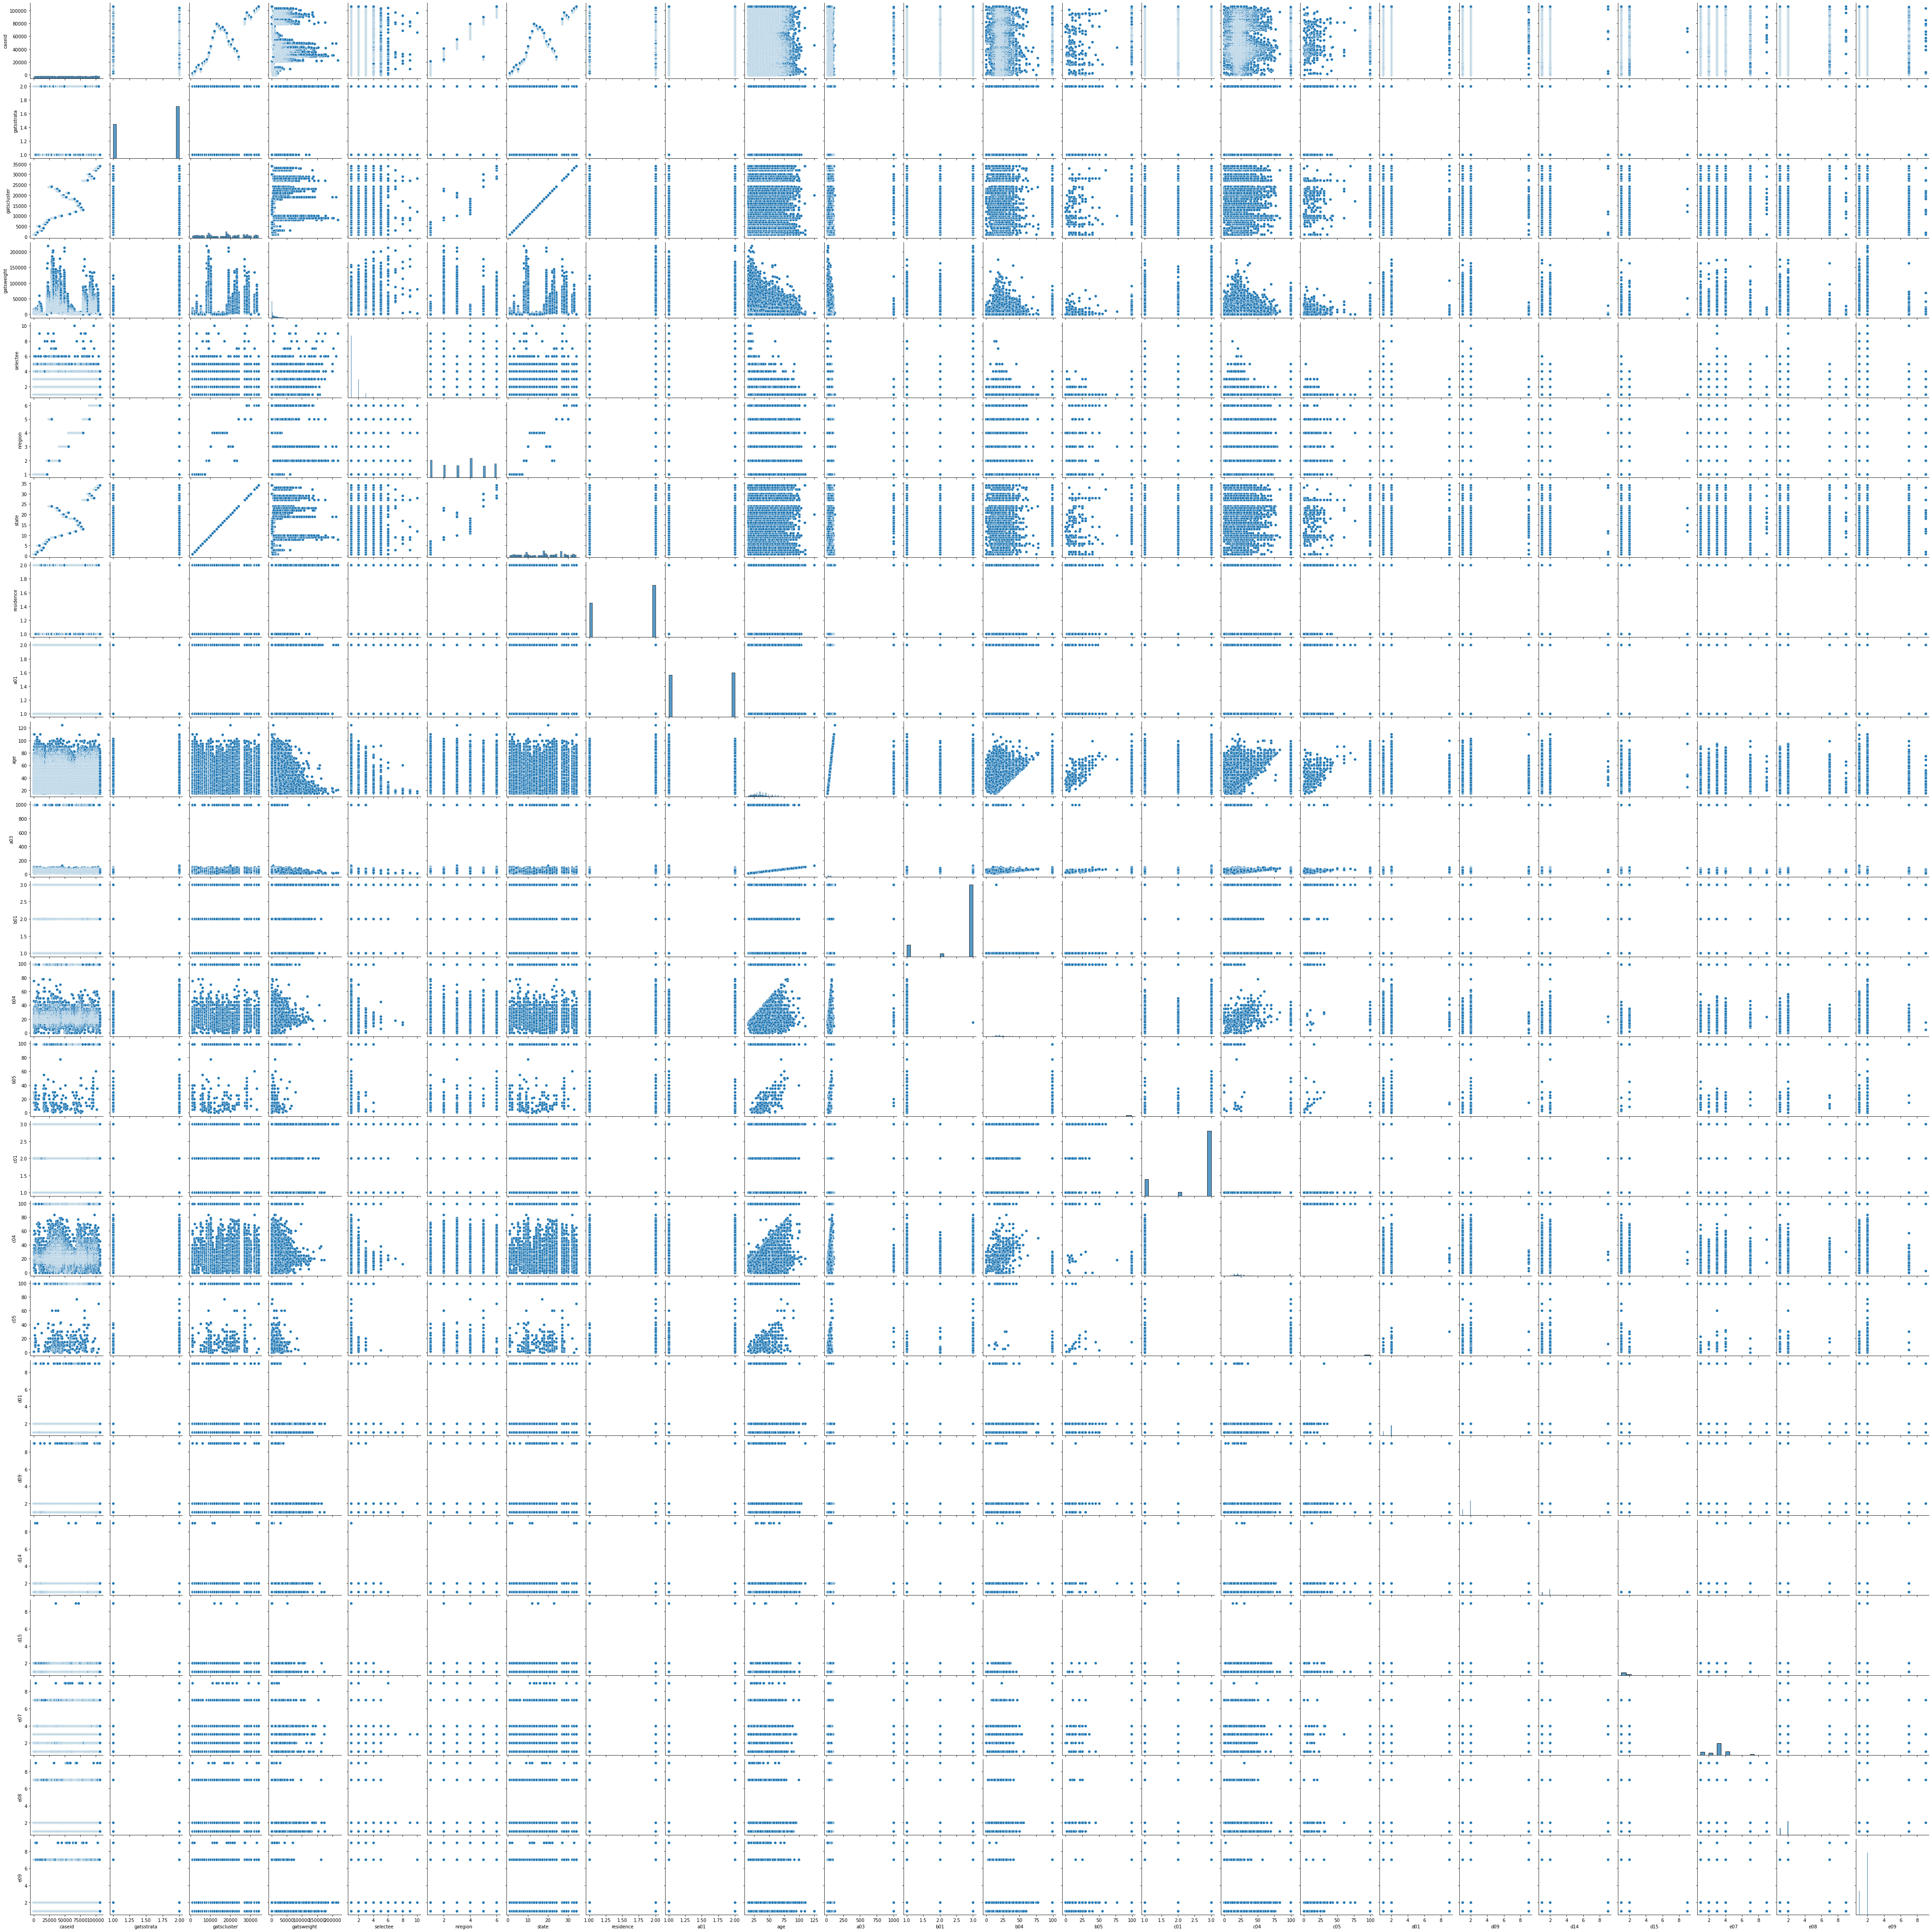

In [42]:
sns.pairplot(gats_1_v)

In [ ]:
sns.pairplot(gats_2_v)

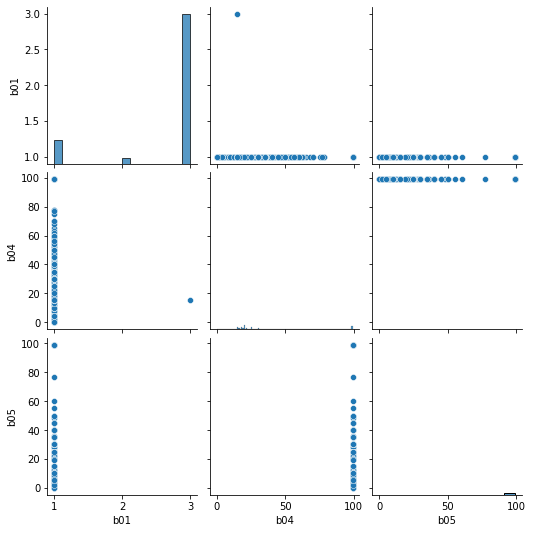

In [43]:
sns.pairplot(gats_1_v[['b01','b04','b05']])

In [ ]:
sns.pairplot(gats_2_v[['B01','B04','B05']])

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(20,10))

boxplot_vkm=sns.boxplot(x='quit_tobacco', y='age', data=gats_1_v, orient='v')

plt.xlabel('tobacco_quit_attempt')
plt.ylabel('Age of the respondent')

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(20,10))

boxplot_vkm=sns.boxplot(x='quit_tobacco', y='AGE', data=gats_2_v, orient='v')

plt.xlabel('tobacco_quit_attempt')
plt.ylabel('Age of the respondent')

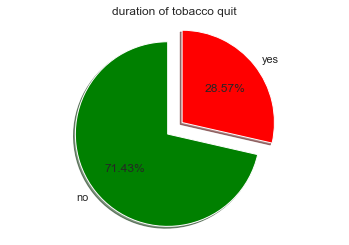

In [52]:
import matplotlib.pyplot as plt

labels=['no', 'yes']
colors=['green', 'red']
sizes=[1500, 600]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('duration of tobacco quit')
plt.axis('equal')
plt.show()

In [44]:
gats_1=(gats_1_v['b01']/gats_1_v['b01'].sum())*100

<ipython-input-44-1ea122a2dee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gats_1_v['percent']=(gats_1_v['b01']/gats_1_v['b01'].sum())*100


In [47]:
gats_1=gats_1_v[['b01']]

In [51]:
# for weighted analysis
pip install weightedcalcs


  Created wheel for weightedcalcs: filename=weightedcalcs-0.1.2-py3-none-any.whl size=3728 sha256=5ac2b8504e74186c7d58043657bedf31046cded57be38b49b51414fc81b99179
  Stored in directory: c:\users\vijaykumarmishra\appdata\local\pip\cache\wheels\b5\d3\ae\700722865a86d3de95f2d04144d4560d75699797bca5353411
Successfully built weightedcalcs


In [57]:
import weightedcalcs as wc

wt_b01 = wc.Calculator("gatsweight")

wt_b01.distribution(gats_1_v, "b01").round(3).sort_values(ascending=True)

b01
2.0    0.03
1.0    0.11
3.0    0.86
Name: gatsweight, dtype: float64

In [59]:
import weightedcalcs as wc

wt_B01 = wc.Calculator("gatsweight")

wt_B01.distribution(gats_2_v, "B01").round(3).sort_values(ascending=True)

B01
2.0    0.021
1.0    0.086
3.0    0.893
Name: gatsweight, dtype: float64

In [19]:
#cross-tab visualization through heatmap

def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=False,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

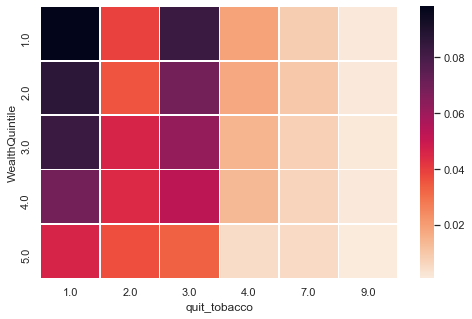

In [21]:
cross = pd.crosstab(vkm_dhs_1['WealthQuintile'], vkm_dhs_1['quit_tobacco'], normalize=True)

plot_heatmap(cross, fmt='.2%')

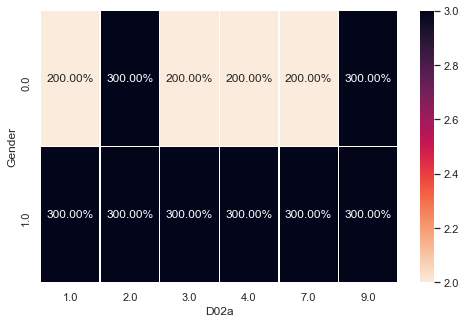

In [34]:
pd.crosstab(index=vkm_dhs_1['Age'],
            columns=vkm_dhs_1['HighestLevelEducation'],
            margins=True,
            margins_name='Total Percentage',
            normalize=False)

plot_heatmap(cross, fmt='.2%')

In [ ]:
sns.heatmap(vkm_dhs_1.corr(), annot=True)

In [ ]:
#separating outcome and independent variables

vk_outcome=vkm_dhs['tob']

# make a copy of data set

vkm_dhs_c=vkm_dhs.copy()

vkm_dhs_cv=vkm_dhs_c.drop(['tob', 'wealth_index'],  axis=1)

In [ ]:
vk_indp=vkm_dhs_cv

In [ ]:
vk_indp

In [ ]:
vk_outcome

In [ ]:
#encoding outcome variable (coverting categorical into numerical)

le = LabelEncoder()
vk_outcome = le.fit_transform(vk_outcome)

vk_outcome

In [ ]:
vk_indp = vk_indp[['residence', 'maternal_edu', 'hh_wealth_index', 'age']]
vk_indp = pd.concat([vk_indp,pd.get_dummies(vk_indp['hh_wealth_index'])], axis=1)
vk_indp = pd.concat([vk_indp,pd.get_dummies(vk_indp['pk'])], axis=1)
vk_indp = pd.concat([vk_indp,pd.get_dummies(vk_indp['sex'])], axis=1)
vk_indp = pd.concat([vk_indp,pd.get_dummies(vk_indp['residence'])], axis=1)
vk_indp = pd.concat([vk_indp,pd.get_dummies(vk_indp['maternal_edu'])], axis=1)

vk_indp.head()

In [ ]:
#hot encoding to convert categorical variables into dichotomous/binary and appending them to featured data set

In [ ]:
vk_indp.drop(['residence','maternal_edu'], axis = 1, inplace=True)

In [ ]:
vk_indp

In [ ]:
# Splitting the data into two subparts train vs test

vk_indp_train, vk_indp_test, vk_outcome_train, vk_outcome_test = train_test_split(vk_indp , vk_outcome, test_size = 0.2, random_state = 42)

print("Training split input- ", vk_indp_train.shape)
print("Testing split input- ", vk_indp_test.shape)

print("Training split input- ", vk_outcome_train.shape)
print("Testing split input- ", vk_outcome_test.shape)

#80 percent cases of data for training purpose, and 20% of data for testing purpose

In [ ]:
#decision treee classifier created

dtree=DecisionTreeClassifier()

dtree.fit(vk_indp_train,vk_outcome_train)

print('Decision Tree Classifier ')

In [ ]:
#predicting values of test data

vk_outcome_pred = dtree.predict(vk_indp_test)

print("Classification report - \n", classification_report(vk_outcome_test, vk_outcome_pred))

In [ ]:
Interpretation: The overall accuracy of the testing data is 59 percent 

In [ ]:
#plotting confusion matrix

con_mat = confusion_matrix(vk_outcome_test, vk_outcome_pred)

plt.figure(figsize=(5,5))

sns.heatmap(data=con_mat,linewidths=.5, annot=True,square = True,  cmap = 'Reds')

plt.ylabel('actual label')

plt.xlabel('predicted label')

all_sample_title = 'accuracy: {0}'.format(dtree.score(vk_indp_test, vk_outcome_test))

plt.title(all_sample_title, size = 15)

In [ ]:
# visualize the decision tree

decision_tree = plot_tree(decision_tree=dtree, feature_names = vk_indp.columns, 
                     class_names =["yes", "no"] , filled = True , precision =3, rounded = True)

plt.figure(figsize=(300, 400))

In [ ]:
vk=vkm_dhs['anemia'].values
vk[0:5]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(vkm_train, vk_train)

In [ ]:
#normalize the data set
#data standardization provides data zero mean and unit variance (ideally should be performed after train test split)

vkm=preprocessing.StandardScaler().fit(vkm).transform(vkm)
vkm[0:5]

In [ ]:
# train test splitting of data

In [ ]:
from sklearn.model_selection import train_test_split

vkm_train, vkm_test, vk_train, vk_test = train_test_split( vkm, vk, test_size=0.2, random_state=4)
print ('Train set:', vkm_train.shape,  vk_train.shape)
print ('Test set:', vkm_test.shape,  vk_test.shape)

vkm_train.shape, vk_train.shape

In [ ]:
vkm=preprocessing.StandardScaler().fit(vkm).transform(vkm)
vkm[0:5]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(vkm_train, vk_train)

In [ ]:
vk_pred = lr_model.predict(vkm_test)

In [ ]:
vk_pred

In [ ]:
p= pd.DataFrame({'Actual value': vk_test, 'Predicted value':vk_pred})
p.head()

In [ ]:
# train data set

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(vk_train,vkm_train)
result=logit_model.fit()
print(result.summary2())

In [ ]:
#model fitting 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vkm_train, vkm_test, vk_train, vk_test = train_test_split(vkm, vk, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(vkm_train, vk_train)

In [ ]:
vk_pred = logreg.predict(vkm_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(vkm_test, vk_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(vk_test, vk_pred)
print(confusion_matrix)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(vk_test, vk_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(vk_test, vk_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(vk_test, logreg.predict(vkm_test))
fpr, tpr, thresholds = roc_curve(vk_test, logreg.predict_proba(vkm_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#For Spatial Analysis

!pip install pyshp

In [ ]:
conda install fiona

In [ ]:
conda install geopandas

In [ ]:
conda install pysal

In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Ind_shp = "/Users/vijaykumar_matrix_010101/Desktop/GATS/States/Admin2.shp"

In [3]:
In_map= shp.Reader(Ind_shp)

In [4]:
len(In_map.shapes())

36

In [5]:
In_map.records()

[Record #0: ['Andaman & Nicobar Island'],
 Record #1: ['Andhra Pradesh'],
 Record #2: ['Arunanchal Pradesh'],
 Record #3: ['Assam'],
 Record #4: ['Bihar'],
 Record #5: ['Chandigarh'],
 Record #6: ['Chhattisgarh'],
 Record #7: ['Dadara & Nagar Havelli'],
 Record #8: ['Daman & Diu'],
 Record #9: ['Goa'],
 Record #10: ['Gujarat'],
 Record #11: ['Haryana'],
 Record #12: ['Himachal Pradesh'],
 Record #13: ['Jammu & Kashmir'],
 Record #14: ['Jharkhand'],
 Record #15: ['Karnataka'],
 Record #16: ['Kerala'],
 Record #17: ['Lakshadweep'],
 Record #18: ['Madhya Pradesh'],
 Record #19: ['Maharashtra'],
 Record #20: ['Manipur'],
 Record #21: ['Meghalaya'],
 Record #22: ['Mizoram'],
 Record #23: ['Nagaland'],
 Record #24: ['NCT of Delhi'],
 Record #25: ['Puducherry'],
 Record #26: ['Punjab'],
 Record #27: ['Rajasthan'],
 Record #28: ['Sikkim'],
 Record #29: ['Tamil Nadu'],
 Record #30: ['Telangana'],
 Record #31: ['Tripura'],
 Record #32: ['Uttar Pradesh'],
 Record #33: ['Uttarakhand'],
 Record #34

In [6]:
In_map.records()[1][0]

'Andhra Pradesh'

In [7]:
#convert into panda data frame
def read_shapefile(Ind_map):
    fields = [x[0] for x in Ind_map.fields][1:]
    records = Ind_map.records()
    shps = [s.points for s in Ind_map.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [8]:
df = read_shapefile(In_map)
df.shape

(36, 2)

In [9]:
df.sample(36)

,ST_NM,coords
27,Rajasthan,"[(73.8984889428105, 29.978955440041602), (73.9..."
26,Punjab,"[(75.88469360122878, 32.48840602821571), (75.9..."
29,Tamil Nadu,"[(78.1918808983848, 8.727295397864395), (78.18..."
25,Puducherry,"[(79.7652757429812, 10.99681175375946), (79.76..."
5,Chandigarh,"[(76.84147287327454, 30.759959340351315), (76...."
12,Himachal Pradesh,"[(76.79633817057015, 33.25489599215638), (76.8..."
34,West Bengal,"[(88.0186080060547, 21.572778999351385), (88.0..."
24,NCT of Delhi,"[(77.09361369721444, 28.86939745742677), (77.1..."
28,Sikkim,"[(88.65381086647835, 28.09882815879257), (88.6..."
0,Andaman & Nicobar Island,"[(93.71975948121514, 7.2070676362624795), (93...."


In [ ]:
def plot_shape(id, s=None):
    plt.figure()
    
    ax = plt.axes()
    ax.set_aspect('equal')

    shape_ex = In_map.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
DIST_NAME = ‘JAIPUR’
com_id = df[df.DIST_NAME=‘JAIPUR’].index.get_values()[0]

plot_shape(com_id, DIST_NAME)

In_map.shape(com_id)

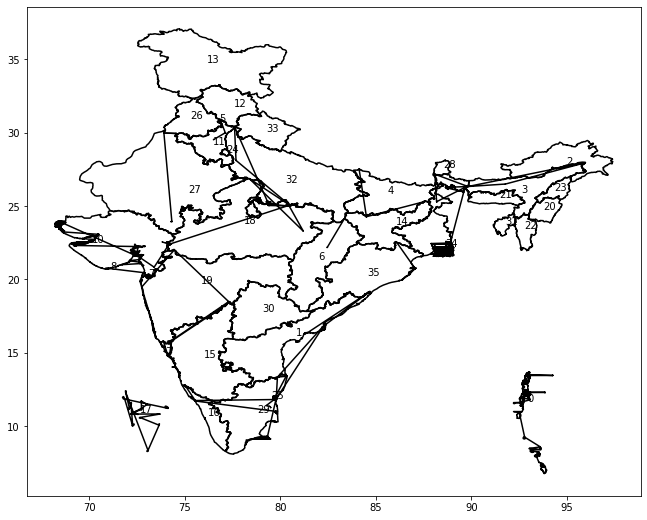

In [10]:
def plot_map(In_map, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in In_map.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

plot_map(In_map)


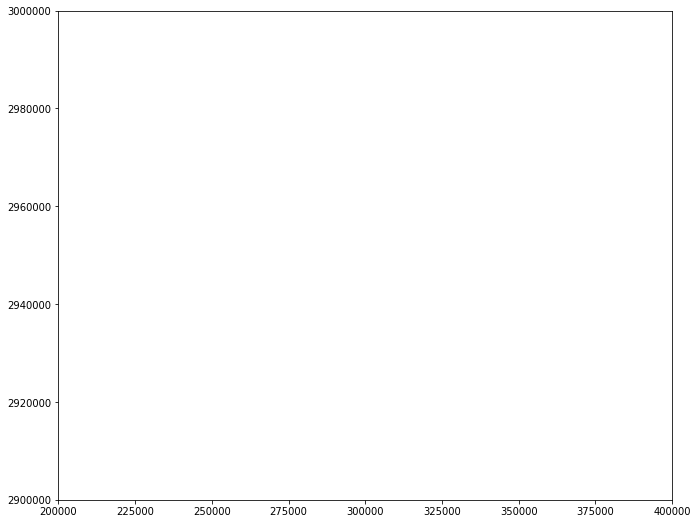

In [11]:
y_lim = (2900000,3000000) # latitude
x_lim = (200000, 400000) # longitude
plot_map(In_map, x_lim, y_lim)

In [12]:
#color a single district 
def plot_map_fill(id, In_map, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in In_map.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = In_map.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

<Figure size 792x648 with 0 Axes>

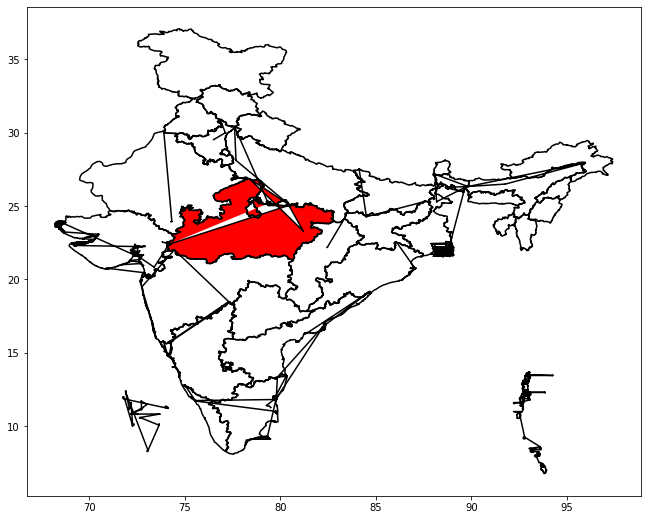

In [13]:
plot_map_fill(18, In_map)

In [14]:
def plot_map_fill_multiples_ids(title, city, In_map, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
  
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in In_map.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = In_map.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
city_id = [0, 1, 2, 3, 4, 5, 6]

plot_map_fill_multiples_ids(“Multiple Shapes”,city_id, In_map, color='g')

In [15]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [ ]:
###plotting heat map

def plot_cities_data(In_map, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(In_map)
    city_id = []
    for i in cities:
        city_id.append(df[df.DIST_NAME == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in In_map.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = In_map.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
print_id=True
plot_cities_data(print_id)

In [ ]:
names= [‘JAIPUR’,’BIKANER’,’CHURU’,’BHILWARA’,’UDAIPUR’]

data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]

print_id = True # The shape id will be printed

color_pallete = 1 # ‘Purple’

plot_cities_data(In_map, ‘Heat map of given cities’, names, data, color_pallete, print_id)